In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [156]:
df=pd.read_csv('datasets_596958_1073629_Placement_Data_Full_Class.csv')

In [3]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [4]:
#EDA

In [5]:
df.shape

(215, 15)

In [6]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [8]:
#features with missing values

ft_with_na=[features for features in df.columns if(df[features].isnull().sum()>1)]
for features in ft_with_na:
    print("The feature is {} and the missing value % is {}".format(features,np.round(df[features].isnull().mean(),4)*100))

The feature is salary and the missing value % is 31.16


In [9]:
#numerical features
num_ft=[features for features in df.columns if(df[features].dtypes!='O')]
num_ft

['sl_no', 'ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

In [10]:
#discrete numerical features
dt_num_ft=[features for features in num_ft if((len(df[features].unique())<25))]
dt_num_ft


[]

In [11]:
#continuous numerical features
continuous_features=[features for features in num_ft if features not in dt_num_ft+['sl_no']]
continuous_features

['ssc_p', 'hsc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']

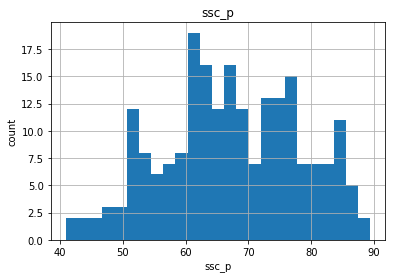

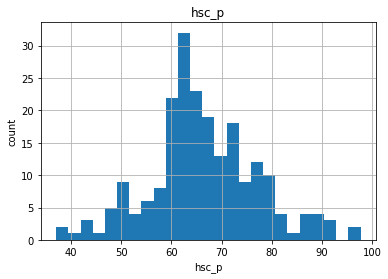

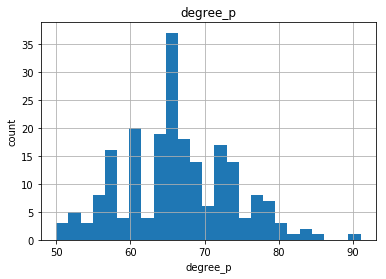

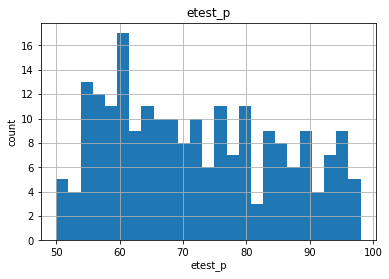

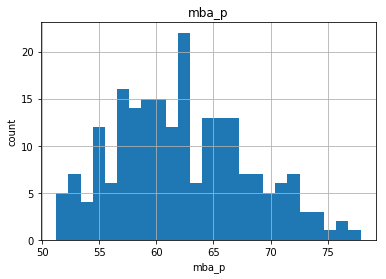

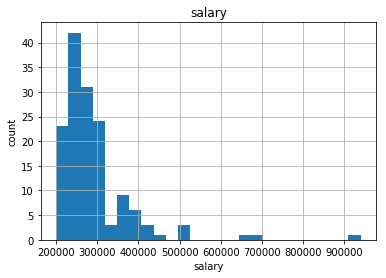

In [12]:
for features in continuous_features:
    data=df.copy()
    data[features].hist(bins=25)
    plt.xlabel(features)
    plt.ylabel('count')
    plt.title(features)
    plt.show()
    

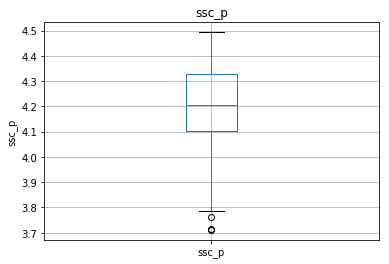

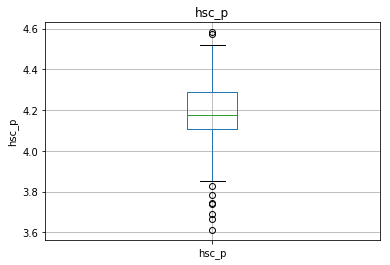

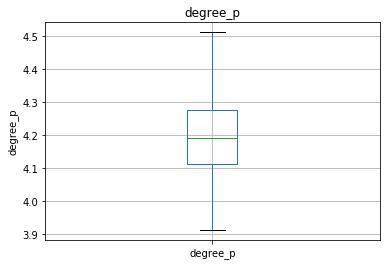

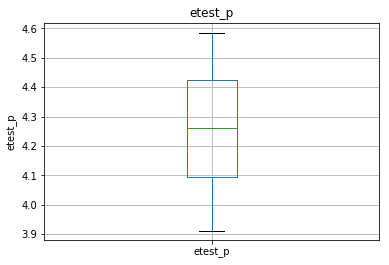

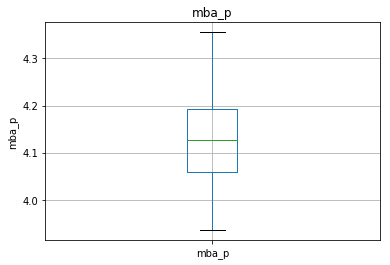

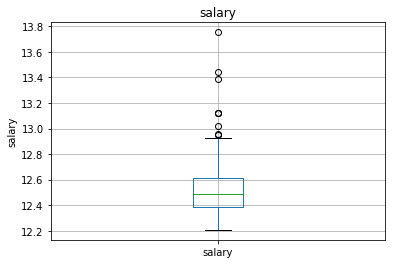

In [17]:
#outliers
for feature in continuous_features:
    data=df.copy()
    if 0 in data[feature].unique():
        
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

In [24]:
#categorical features
cat_ft=[ft for ft in df.columns if(df[ft].dtypes=='O')]
cat_ft

['gender',
 'ssc_b',
 'hsc_b',
 'hsc_s',
 'degree_t',
 'workex',
 'specialisation',
 'status']

In [25]:
df[cat_ft].head()

,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,specialisation,status
0,M,Others,Others,Commerce,Sci&Tech,No,Mkt&HR,Placed
1,M,Central,Others,Science,Sci&Tech,Yes,Mkt&Fin,Placed
2,M,Central,Central,Arts,Comm&Mgmt,No,Mkt&Fin,Placed
3,M,Central,Central,Science,Sci&Tech,No,Mkt&HR,Not Placed
4,M,Central,Central,Commerce,Comm&Mgmt,No,Mkt&Fin,Placed


In [27]:
for ft in cat_ft:
    print('the feature is {} and no.of categories are {}'.format(ft,len(df[ft].unique())))

the feature is gender and no.of categories are 2
the feature is ssc_b and no.of categories are 2
the feature is hsc_b and no.of categories are 2
the feature is hsc_s and no.of categories are 3
the feature is degree_t and no.of categories are 3
the feature is workex and no.of categories are 2
the feature is specialisation and no.of categories are 2
the feature is status and no.of categories are 2


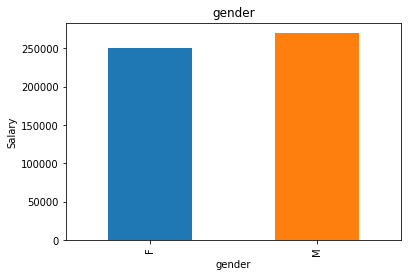

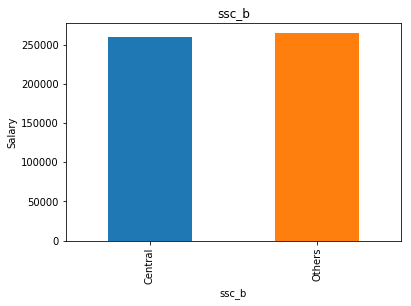

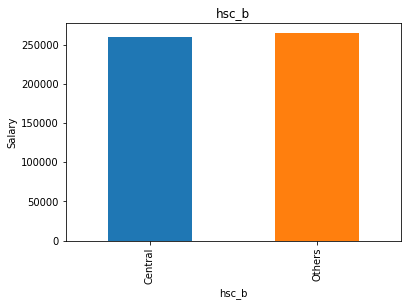

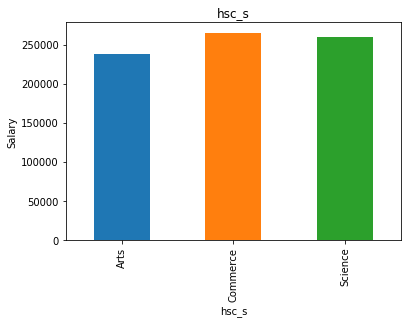

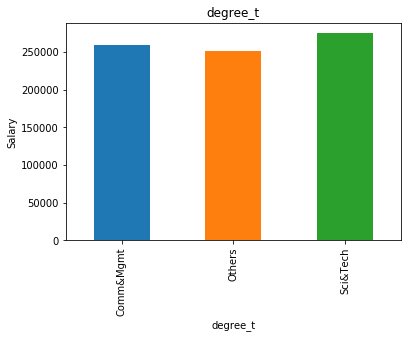

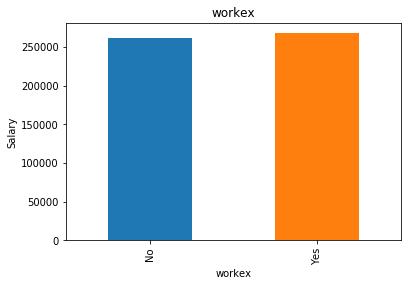

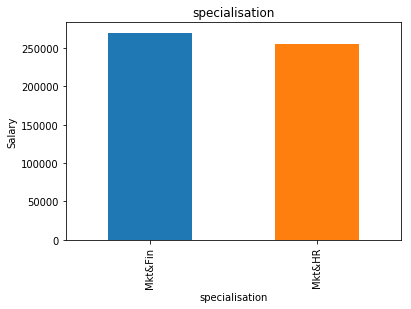

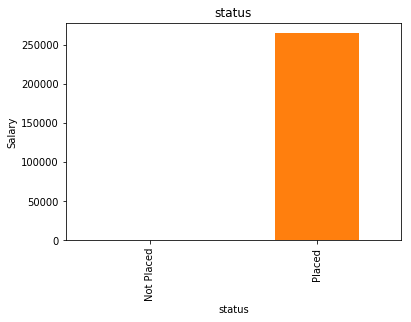

In [30]:
for ft in cat_ft:
    data=df.copy()
    data.groupby(ft)['salary'].median().plot.bar()
    plt.xlabel(ft)
    plt.ylabel('Salary')
    plt.title(ft)
    plt.show()

In [157]:
df['salary']=df['salary'].fillna(0)

In [44]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.00,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.50,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.00,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.00,Mkt&HR,59.43,Not Placed,0.0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.80,Mkt&Fin,55.50,Placed,425000.0
5,6,M,55.00,Others,49.80,Others,Science,67.25,Sci&Tech,Yes,55.00,Mkt&Fin,51.58,Not Placed,0.0
6,7,F,46.00,Others,49.20,Others,Commerce,79.00,Comm&Mgmt,No,74.28,Mkt&Fin,53.29,Not Placed,0.0
7,8,M,82.00,Central,64.00,Central,Science,66.00,Sci&Tech,Yes,67.00,Mkt&Fin,62.14,Placed,252000.0
8,9,M,73.00,Central,79.00,Central,Commerce,72.00,Comm&Mgmt,No,91.34,Mkt&Fin,61.29,Placed,231000.0
9,10,M,58.00,Central,70.00,Central,Commerce,61.00,Comm&Mgmt,No,54.00,Mkt&Fin,52.21,Not Placed,0.0


In [158]:
feat=['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status']
for ft in feat:
    df_ft='ft'+'_'+ft
    df_ft=pd.get_dummies(df[ft],prefix=ft)
    ft1=df.join(df_ft)
    df=ft1

In [46]:
df.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],axis=1,inplace=True)

In [160]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [48]:
pd.pandas.set_option('display.max_columns',None)

In [161]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [50]:
x=df.loc[:,df.columns!='salary']
y=df.salary

In [51]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [53]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [54]:
x_train

array([[-1.41902199, -0.41062939, -0.02969098, ..., -0.90029235,
        -0.64922077,  0.64922077],
       [ 0.48603784,  0.45569151, -0.94242717, ...,  1.1107503 ,
        -0.64922077,  0.64922077],
       [ 0.27792206, -0.07372682,  0.02399938, ..., -0.90029235,
        -0.64922077,  0.64922077],
       ...,
       [ 0.19787753,  0.93698089,  0.7577677 , ..., -0.90029235,
        -0.64922077,  0.64922077],
       [-0.9227459 , -0.41062939, -0.58449141, ..., -0.90029235,
        -0.64922077,  0.64922077],
       [ 1.07836736,  0.55194938, -0.76345929, ...,  1.1107503 ,
        -0.64922077,  0.64922077]])

In [55]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor(n_estimators=10,random_state=0)
reg.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

In [56]:
y_pred=reg.predict(x_test)

In [57]:
y_pred

array([     0., 253600., 292400.,      0., 248700.,      0., 228700.,
       253000.,      0., 326200., 280800., 287500., 355600., 271000.,
       461700., 249500., 247200.,      0., 431000.,      0.,      0.,
            0., 253600.,      0.,      0.,      0., 295000., 256700.,
       251000., 316600., 342100.,      0., 270400.,      0.,      0.,
       237500., 339500., 254800., 473100., 421500.,      0.,      0.,
       278000.])

In [58]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.8072449262224908

    ##Building classification model on same dataset by taking status as a dependent variable i.e,whether he is placed or not

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [60]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Not Placed,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,270000.0,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0,1
1,2,79.33,78.33,77.48,86.5,66.28,200000.0,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1
2,3,65.00,68.00,64.00,75.0,57.80,250000.0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0.0,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,1,0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1


In [61]:
df.drop(['salary','status_Not Placed'],axis=1,inplace=True)

In [62]:
df.head()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender_F,gender_M,ssc_b_Central,ssc_b_Others,hsc_b_Central,hsc_b_Others,hsc_s_Arts,hsc_s_Commerce,hsc_s_Science,degree_t_Comm&Mgmt,degree_t_Others,degree_t_Sci&Tech,workex_No,workex_Yes,specialisation_Mkt&Fin,specialisation_Mkt&HR,status_Placed
0,1,67.00,91.00,58.00,55.0,58.80,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,1,1
1,2,79.33,78.33,77.48,86.5,66.28,0,1,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1
2,3,65.00,68.00,64.00,75.0,57.80,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1
3,4,56.00,52.00,52.00,66.0,59.43,0,1,1,0,1,0,0,0,1,0,0,1,1,0,0,1,0
4,5,85.80,73.60,73.30,96.8,55.50,0,1,1,0,1,0,0,1,0,1,0,0,1,0,1,0,1


In [145]:
x1=df.iloc[:,:-1].values
y1=df.iloc[:,-1].values

In [146]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.3,random_state=0)

In [147]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [148]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression()
classifier.fit(x_train,y_train)


C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [149]:

y_pred1=classifier.predict(x_test)

In [150]:
y_pred1

array([0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
      dtype=uint8)

In [ ]:
#Making confusion matrix and accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred1)
print(cm)
accuracy_score(y_test,y_pred1)

In [155]:
#k cross validation
from sklearn.model_selection import cross_val_score
accuracies=cross_val_score(estimator=classifier,X=x_train,y=y_train,cv=10)
print("Accuracy : {}".format(accuracies.mean()*100))
print("standard deviation : {}".format(accuracies.std()*100))

Accuracy : 86.64285714285714
standard deviation : 6.609673475044893


C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\sai lokesh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Spec